# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

cities_upper=[]

cities_upper=[word.title() for word in cities]
len(cities_upper)

587

In [5]:
cities_upper

['Waingapu',
 'Kavieng',
 'Paamiut',
 'Vaini',
 'Hilo',
 'Illoqqortoormiut',
 'Pisco',
 'Hithadhoo',
 'Lerwick',
 'Phumi Samraong',
 'Carnarvon',
 'Kazalinsk',
 'Port Alfred',
 'Busselton',
 'Ushuaia',
 'Mataura',
 'Namibe',
 'Novi Troyany',
 'Arman',
 'Lavrentiya',
 'San Nicolas',
 'Upernavik',
 'Faanui',
 'Rikitea',
 'Perote',
 'Pascagoula',
 'Nanortalik',
 'Berdigestyakh',
 'Georgetown',
 'Akhmim',
 'Avarua',
 'Oistins',
 'Bluff',
 'Cabo San Lucas',
 'Adrar',
 'Cape Town',
 'Bilibino',
 'Burns Lake',
 'Lethem',
 'Westport',
 'Punta Arenas',
 'Chuy',
 'Talnakh',
 'Zabid',
 'Roebourne',
 'Clyde River',
 'Puerto Ayora',
 'Hermanus',
 'Cockburn Town',
 'Praia Da Vitoria',
 'Kampot',
 'Norman Wells',
 'Mahebourg',
 'Hobart',
 'San Cristobal',
 'Lompoc',
 'Alta Floresta',
 'Juba',
 'Jamestown',
 'Tiznit',
 'Cascais',
 'Attawapiskat',
 'Saskylakh',
 'Khunti',
 'Tasiilaq',
 'Butaritari',
 'Bahia De Caraquez',
 'Ust-Nera',
 'Taolanaro',
 'Lipin Bor',
 'Yellowknife',
 'Kamoke',
 'Tuktoyaktuk'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info

city_name=[]
cloud=[]
country=[]
date=[]
hum=[]
lat = []
lng=[]
max_temp = []
wind_speed=[]

i=1 #Counter for cities
j=1 #Counter for stes
k=0 #Counter for cities list

city_test=['Paris']
# Loop through the list of cities and perform a request for data on each
for city in cities_upper:
    response = requests.get(query_url + city).json()
    print(query_url+city)
    
    try:
              
        city_name.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        hum.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {i} of Set {j}!|{city_name[k]}")
        i=i+1
        k=k+1
        if i > 50:
            i=1
            j=j+1
  
      
    # Exceptions of not finding the city
    except:
        # Append null values
        print("City not found. Skipping...")
        pass


http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Waingapu
Processing Record 1 of Set 1!|Waingapu
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Kavieng
Processing Record 2 of Set 1!|Kavieng
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Paamiut
Processing Record 3 of Set 1!|Paamiut
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Vaini
Processing Record 4 of Set 1!|Vaini
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Hilo
Processing Record 5 of Set 1!|Hilo
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Illoqqortoormiut
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Pisco
Processing Record 6 

Processing Record 3 of Set 2!|Lompoc
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Alta Floresta
Processing Record 4 of Set 2!|Alta Floresta
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Juba
Processing Record 5 of Set 2!|Juba
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Jamestown
Processing Record 6 of Set 2!|Jamestown
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Tiznit
Processing Record 7 of Set 2!|Tiznit Province
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Cascais
Processing Record 8 of Set 2!|Cascais
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Attawapiskat
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1

http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Hualmay
Processing Record 4 of Set 3!|Hualmay
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Scranton
Processing Record 5 of Set 3!|Scranton
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Luanda
Processing Record 6 of Set 3!|Luanda
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Lorengau
Processing Record 7 of Set 3!|Lorengau
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Coquimbo
Processing Record 8 of Set 3!|Coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Catia La Mar
Processing Record 9 of Set 3!|Catia La Mar
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Isa

http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Palabuhanratu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Thompson
Processing Record 4 of Set 4!|Thompson
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Lagoa
Processing Record 5 of Set 4!|Lagoa
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Cherskiy
Processing Record 6 of Set 4!|Cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Kapaa
Processing Record 7 of Set 4!|Kapaa
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Kijang
Processing Record 8 of Set 4!|Gijang
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Sao Filipe
Processing Recor

http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Beloha
Processing Record 1 of Set 5!|Beloha
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Melita
Processing Record 2 of Set 5!|Melita
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=George Town
Processing Record 3 of Set 5!|George Town
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Monastyrshchina
Processing Record 4 of Set 5!|Monastyrshchina
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Sawakin
Processing Record 5 of Set 5!|Sawākin
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Oxbow
Processing Record 6 of Set 5!|Oxbow
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=C

http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Umzimvubu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Ancud
Processing Record 2 of Set 6!|Ancud
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Ponta Do Sol
Processing Record 3 of Set 6!|Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Talcahuano
Processing Record 4 of Set 6!|Talcahuano
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Jati
Processing Record 5 of Set 6!|Jati
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Praia
Processing Record 6 of Set 6!|Praia
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Teberda
Processing Reco

http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Mezen
Processing Record 3 of Set 7!|Mezen'
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Griffith
Processing Record 4 of Set 7!|Griffith
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Gardan Diwal
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Lyuban
Processing Record 5 of Set 7!|Lyuban'
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Lincoln
Processing Record 6 of Set 7!|Lincoln
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Huambo
Processing Record 7 of Set 7!|Huambo
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Port Hardy
Processing Reco

http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Katsuura
Processing Record 50 of Set 7!|Katsuura
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Coihaique
Processing Record 1 of Set 8!|Coyhaique
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Port Augusta
Processing Record 2 of Set 8!|Port Augusta
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Aksu
Processing Record 3 of Set 8!|Aksu
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Dinslaken
Processing Record 4 of Set 8!|Dinslaken
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Rafaela
Processing Record 5 of Set 8!|Rafaela
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Mu

http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Esperance
Processing Record 1 of Set 9!|Esperance
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Shcholkine
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Springville
Processing Record 2 of Set 9!|Springville
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Harpanahalli
Processing Record 3 of Set 9!|Harpanahalli
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Saldanha
Processing Record 4 of Set 9!|Saldanha
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Wuwei
Processing Record 5 of Set 9!|Wuwei
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Hauk

http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Flinders
Processing Record 2 of Set 10!|Flinders
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Cabedelo
Processing Record 3 of Set 10!|Cabedelo
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Hirara
Processing Record 4 of Set 10!|Hirara
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Agadez
Processing Record 5 of Set 10!|Agadez
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Gannan
Processing Record 6 of Set 10!|Gannan
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Tabas
Processing Record 7 of Set 10!|Tabas
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Payson
Processing

http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Kainantu
Processing Record 2 of Set 11!|Kainantu
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Santa Rosa
Processing Record 3 of Set 11!|Santa Rosa
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Dimovo
Processing Record 4 of Set 11!|Dimovo
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Tual
Processing Record 5 of Set 11!|Tual
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Sakakah
Processing Record 6 of Set 11!|Sakakah
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Sorland
Processing Record 7 of Set 11!|Sørland
http://api.openweathermap.org/data/2.5/weather?appid=5cc37ec32b2eb7d1e6ca3fad5dc3dda2&units=metric&q=Lar Gerd
Ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df=pd.DataFrame(city_name)
cloud_df=pd.DataFrame(cloud)
country_df=pd.DataFrame(country)
date_df=pd.DataFrame(date)
hum_df=pd.DataFrame(hum)
lat_df = pd.DataFrame(lat)
lng_df=pd.DataFrame(lng)
max_temp_df = pd.DataFrame(max_temp)
wind_speed_df=pd.DataFrame(wind_speed)


weather_df["Cloudiness"]=cloud_df
weather_df["Country"]=country_df
weather_df["Date"]=date_df
weather_df["Humidity"]=hum_df
weather_df["Lat"]=lat_df
weather_df["Lng"]=lng_df
weather_df["Max Temp"]=max_temp_df
weather_df["Wind Speed"]=wind_speed_df


weather_df_rename = weather_df.rename(columns={0:"City"})


#Save file
weather_df_rename.to_csv('weather_city.csv')

weather_df_rename.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max Temp      534
Wind Speed    534
dtype: int64

In [8]:
weather_df_rename

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Waingapu,42,ID,1584864061,71,-9.66,120.26,29.67,4.68
1,Kavieng,9,PG,1584864061,66,-2.57,150.80,29.87,1.81
2,Paamiut,100,GL,1584864061,60,61.99,-49.67,-8.33,7.69
3,Vaini,90,TO,1584864061,94,-21.20,-175.20,24.00,4.60
4,Hilo,90,US,1584863959,78,19.73,-155.09,22.00,2.82
...,...,...,...,...,...,...,...,...,...
529,Sungai Penuh,100,ID,1584864173,96,-2.08,101.38,19.77,0.36
530,Xiaoyi,100,CN,1584864173,26,34.62,109.70,24.07,2.17
531,Pokhara,44,NP,1584864173,39,28.23,83.98,24.77,3.07
532,Kilindoni,0,TZ,1584864173,70,-7.91,39.67,29.17,3.58


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

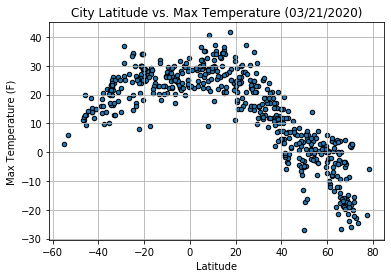

In [9]:
fig, ax = plt.subplots()
weather_df_rename.plot(kind='scatter', x='Lat', y='Max Temp', ax=ax, marker='o',edgecolors="black")

# Turn on the grid
ax.grid()

# Set the label for the x-axis
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title ("City Latitude vs. Max Temperature (03/21/2020)")

plt.show()

#### Latitude vs. Humidity Plot

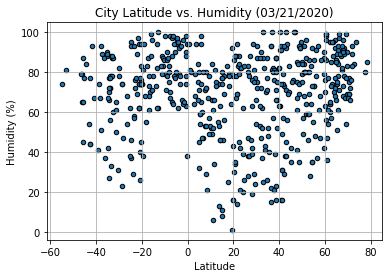

In [10]:
fig, ax = plt.subplots()
weather_df_rename.plot(kind='scatter', x='Lat', y='Humidity', ax=ax, marker='o',edgecolors="black")

# Turn on the grid
ax.grid()

# Set the label for the x-axis
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title ("City Latitude vs. Humidity (03/21/2020)")

plt.show()

#### Latitude vs. Cloudiness Plot

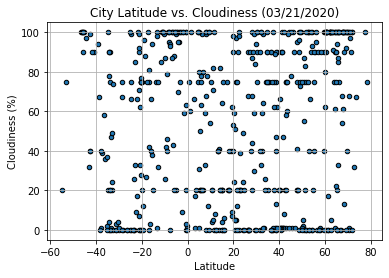

In [11]:
fig, ax = plt.subplots()
weather_df_rename.plot(kind='scatter', x='Lat', y='Cloudiness', ax=ax, marker='o',edgecolors="black")

# Turn on the grid
ax.grid()

# Set the label for the x-axis
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title ("City Latitude vs. Cloudiness (03/21/2020)")

plt.show()

#### Latitude vs. Wind Speed Plot

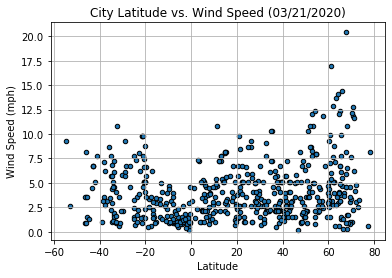

In [12]:
fig, ax = plt.subplots()
weather_df_rename.plot(kind='scatter', x='Lat', y='Wind Speed', ax=ax, marker='o',edgecolors="black")

# Turn on the grid
ax.grid()

# Set the label for the x-axis
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title ("City Latitude vs. Wind Speed (03/21/2020)")

plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [16]:
# Create Northern and Southern Hemisphere DataFrames

northern_df = weather_df_rename.loc[weather_df_rename["Lat"] > 0, :]
southern_df = weather_df_rename.loc[weather_df_rename["Lat"] < 0, :]

southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Waingapu,42,ID,1584864061,71,-9.66,120.26,29.67,4.68
1,Kavieng,9,PG,1584864061,66,-2.57,150.80,29.87,1.81
3,Vaini,90,TO,1584864061,94,-21.20,-175.20,24.00,4.60
5,Pisco,75,PE,1584864062,73,-13.70,-76.22,23.00,1.50
6,Hithadhoo,0,MV,1584864062,63,-0.60,73.08,29.27,1.82
...,...,...,...,...,...,...,...,...,...
518,Barra do Garças,66,BR,1584863999,99,-15.89,-52.26,20.67,0.93
519,Antofagasta,26,CL,1584864151,93,-23.65,-70.40,16.00,1.00
527,Kokstad,4,ZA,1584864172,31,-30.55,29.42,25.17,2.10
529,Sungai Penuh,100,ID,1584864173,96,-2.08,101.38,19.77,0.36


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

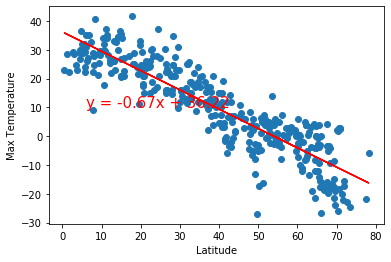

The r-squared is: -0.8944706241046845


In [14]:
#Calculation of linear regression
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot and linear regression equation
plt.scatter(northern_df['Lat'],northern_df['Max Temp'])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

#Print r.squred value
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

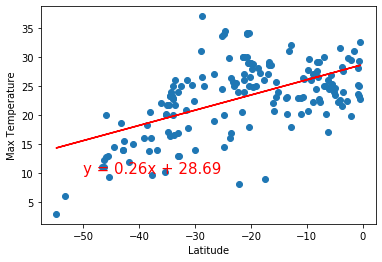

The r-squared is: 0.5596492175876947


In [22]:
#Calculation of linear regression
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot and linear regression equation
plt.scatter(southern_df['Lat'],southern_df['Max Temp'])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

#Print r.squred value
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

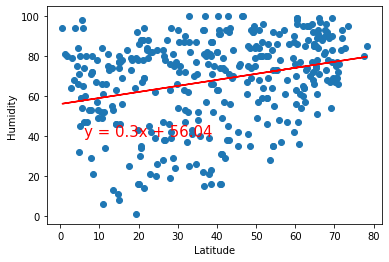

The r-squared is: 0.2829106832976613


In [25]:
#Calculation of linear regression
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot and linear regression equation
plt.scatter(northern_df['Lat'],northern_df['Humidity'])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

#Print r.squred value
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

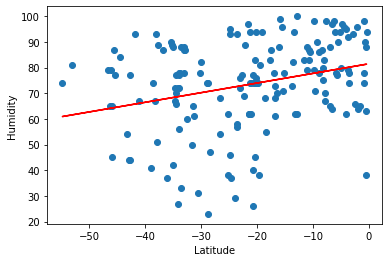

The r-squared is: 0.2865278000218733


In [26]:
#Calculation of linear regression
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot and linear regression equation
plt.scatter(southern_df['Lat'],southern_df['Humidity'])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

#Print r.squred value
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

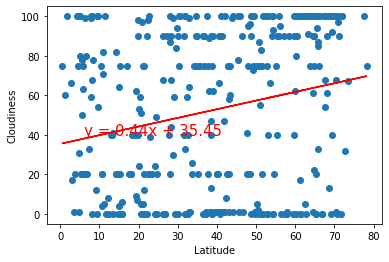

The r-squared is: 0.22708952121878673


In [27]:
#Calculation of linear regression
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot and linear regression equation
plt.scatter(northern_df['Lat'],northern_df['Cloudiness'])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

#Print r.squred value
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

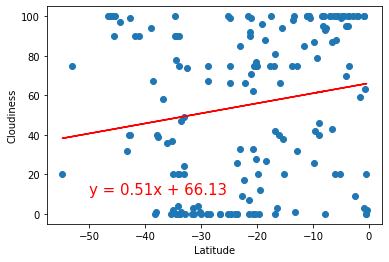

The r-squared is: 0.1741157430229482


In [28]:
#Calculation of linear regression
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot and linear regression equation
plt.scatter(southern_df['Lat'],southern_df['Cloudiness'])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

#Print r.squred value
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

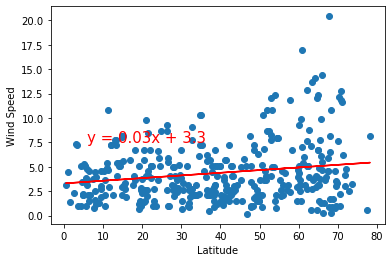

The r-squared is: 0.18509245004464786


In [30]:
#Calculation of linear regression
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot and linear regression equation
plt.scatter(northern_df['Lat'],northern_df['Wind Speed'])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,7.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

#Print r.squred value
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

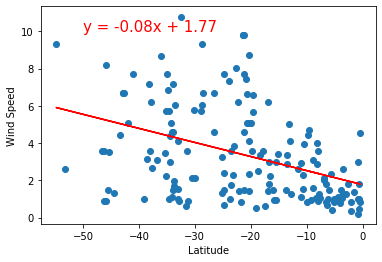

The r-squared is: -0.40381912689124033


In [31]:
#Calculation of linear regression
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot and linear regression equation
plt.scatter(southern_df['Lat'],southern_df['Wind Speed'])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

#Print r.squred value
print(f"The r-squared is: {rvalue}")